<a href="https://colab.research.google.com/github/suriyakanth2711/RoBo-0.0/blob/main/0_0_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data = pd.read_excel("/content/drive/MyDrive/projects/Robo 0.0/SCFP2009panel.xlsx")
data.head()

,YY1,Y1,WGT09,AGE07,AGECL07,EDUC07,EDCL07,MARRIED07,KIDS07,LIFECL07,...,NHMORTPCT,WAGEINCPCT,BUSSEFARMINCPCT,INTDIVINCPCT,KGINCPCT,SSRETINCPCT,TRANSFOTHINCPCT,PSAVINGPCT,LEVERAGEPCT,I
0,1,11,11668.134198,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,270.403054,57
1,1,12,11823.456494,47,3,12,2,1,0,2,...,-21.052632,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,249.593620,57
2,1,13,11913.228354,47,3,12,2,1,0,2,...,-50.000000,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.233358,57
3,1,14,11929.394266,47,3,12,2,1,0,2,...,-33.333333,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,209.273158,57
4,1,15,11917.722907,47,3,12,2,1,0,2,...,-38.596491,-32.931828,0.0,15939.278937,0.0,0.0,0.0,93.125197,232.690767,57


In [ ]:
data.shape

(19285, 515)

In [ ]:
data['RiskFree07']= data['LIQ07'] + data['CDS07'] + data['SAVBND07'] + data['CASHLI07']
data['Risky07'] = data['NMMF07'] + data['STOCKS07'] + data['BOND07']
data['RT07'] = data['Risky07']/(data['Risky07']+data['RiskFree07'])

data['RiskFree09']= data['LIQ09'] + data['CDS09'] + data['SAVBND09'] + data['CASHLI09']
data['Risky09'] = data['NMMF09'] + data['STOCKS09'] + data['BOND09']
data['RT09'] = data['Risky09']/(data['Risky09'] + data['RiskFree09'])

In [ ]:
data['PercentChange'] = np.abs((data['RT09']/data['RT07'])-1)

In [ ]:
data.isnull().any()

YY1              False
Y1               False
WGT09            False
AGE07            False
AGECL07          False
                 ...  
RT07              True
RiskFree09       False
Risky09          False
RT09              True
PercentChange     True
Length: 522, dtype: bool

In [ ]:
data = data.dropna(axis=0)
data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

<ipython-input-8-7291c712a72a>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  data = data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]


In [ ]:
data.isnull().any()
#data.isnull().values.any()

YY1              False
Y1               False
WGT09            False
AGE07            False
AGECL07          False
                 ...  
RT07             False
RiskFree09       False
Risky09          False
RT09             False
PercentChange    False
Length: 522, dtype: bool

<ipython-input-10-a4e01025f51e>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax = sns.distplot(data['RT07'], color='yellow', kde_kws={"color": "k", "lw": 2})


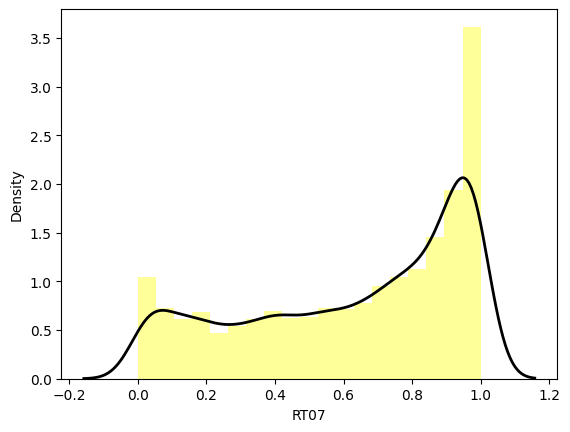

In [ ]:
import seaborn as sns

#RT07
ax = sns.distplot(data['RT07'], color='yellow', kde_kws={"color": "k", "lw": 2})

<ipython-input-11-68db53ce0337>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ax1 = sns.distplot(data['RT09'], color='yellow', kde_kws={"color": "k", "lw": 2})


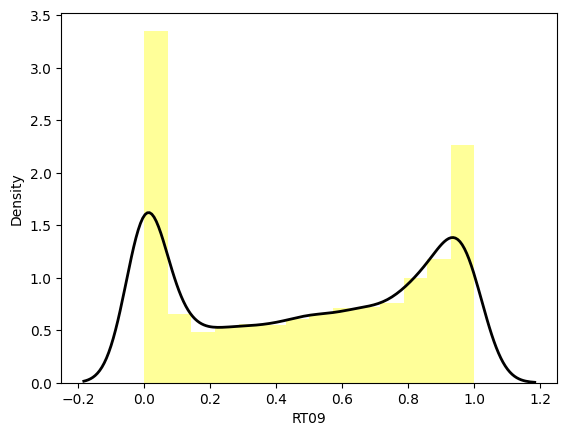

In [ ]:
#RT09
ax1 = sns.distplot(data['RT09'], color='yellow', kde_kws={"color": "k", "lw": 2})

In [ ]:
#extracting investors only whose tolerance level has changed less than 10% from 2007 to 2009

data = data[data['PercentChange']<=0.1]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1956 entries, 40 to 19278
Columns: 522 entries, YY1 to PercentChange
dtypes: float64(217), int64(305)
memory usage: 7.8 MB


In [ ]:
data['AverageRiskTolerance'] = (data['RT07']+data['RT09'])/2

<ipython-input-13-5182a17a6702>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['AverageRiskTolerance'] = (data['RT07']+data['RT09'])/2


In [ ]:
data = data.drop(labels = ['RT07', 'RT09', 'PercentChange'], axis=1)

In [ ]:
features = ['AGE07','EDCL07','MARRIED07','KIDS07','OCCAT107','INCOME07','RISK07','NETWORTH07','AverageRiskTolerance']

drop_features = [col for col in data.columns if col not in features]

data = data.drop(labels=drop_features, axis=1)

In [ ]:
data.head()

,AGE07,EDCL07,MARRIED07,KIDS07,OCCAT107,INCOME07,RISK07,NETWORTH07,AverageRiskTolerance
40,65,4,1,0,3,55378.767875,3,1.024620e+06,0.840871
41,65,4,1,0,3,55378.767875,3,2.091286e+06,0.840871
42,65,4,1,0,3,54313.791570,3,1.449215e+06,0.840871
43,65,4,1,0,3,55378.767875,3,1.894419e+06,0.840871
44,65,4,1,0,3,54313.791570,3,1.677047e+06,0.840871


In [ ]:
data.shape

(1956, 9)

<Axes: title={'center': 'Correlation Matrix'}>

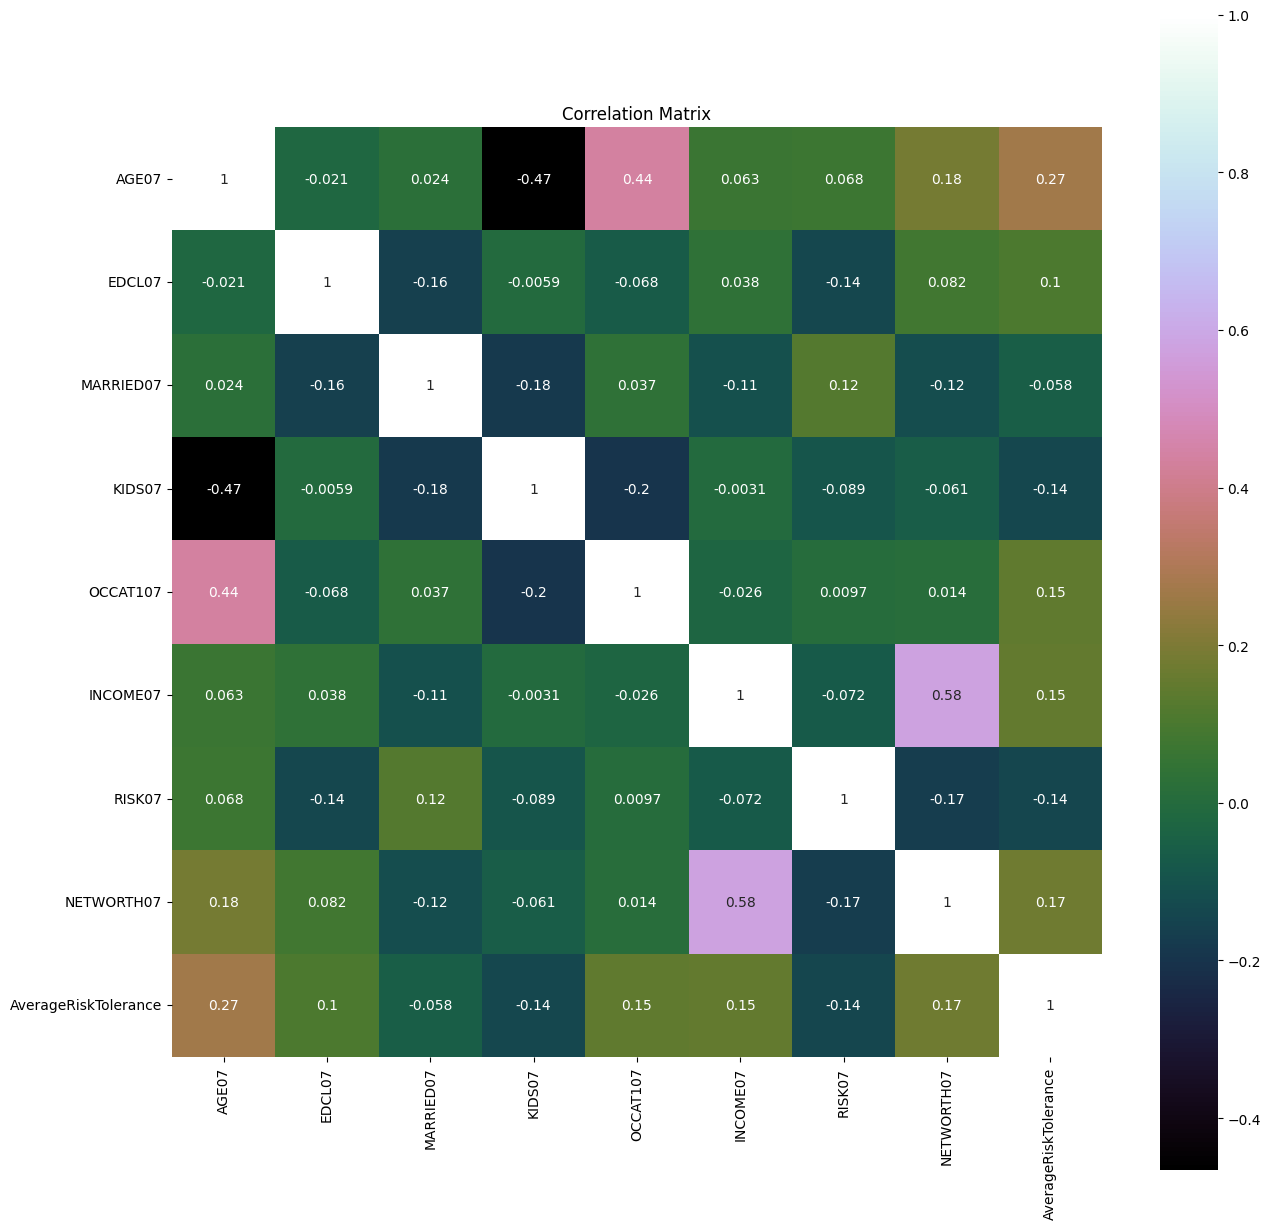

In [ ]:
import matplotlib.pyplot as plt

# correlation
correlation = data.corr()
plt.figure(figsize=(15,15))
plt.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

In [ ]:
#Train test split
from sklearn.model_selection import train_test_split

X = data.drop(labels = ['AverageRiskTolerance'], axis=1)
y = data['AverageRiskTolerance']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))
models.append(('RFR', RandomForestRegressor()))

In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

results = []
names = []
for name, model in models:
  kf = KFold(10)
  cv_results = -1*cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
  results.append(cv_results)
  names.append(name)
  print(name, "=", cv_results.mean())

LR = -0.12098194928632808
KNN = -0.30286335049879254
CART = -0.49552802506152605
SVR = -0.06674497225914965
RFR = -0.7073321745560373


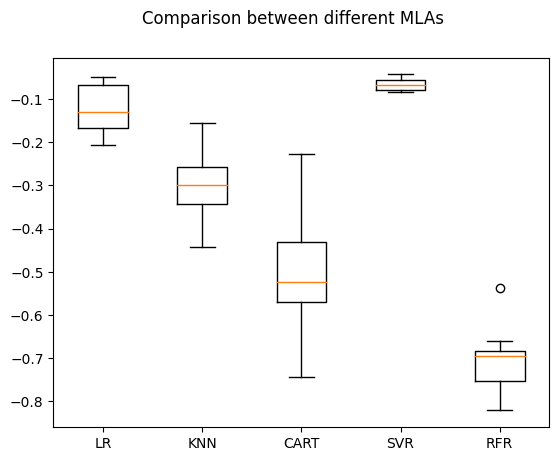

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators': [50,100,150,200,250,300,350,400,500,600]}
model = RandomForestRegressor()
kf = KFold(n_splits=10)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='r2', cv=kf)
grid_result = grid.fit(X_train, y_train)
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.717988 using {'n_estimators': 400}
0.707373 (0.070212) with: {'n_estimators': 50}
0.708546 (0.084422) with: {'n_estimators': 100}
0.710732 (0.079928) with: {'n_estimators': 150}
0.717289 (0.074085) with: {'n_estimators': 200}
0.713206 (0.083961) with: {'n_estimators': 250}
0.714204 (0.080533) with: {'n_estimators': 300}
0.716799 (0.078048) with: {'n_estimators': 350}
0.717988 (0.080573) with: {'n_estimators': 400}
0.716692 (0.078792) with: {'n_estimators': 500}
0.715111 (0.081381) with: {'n_estimators': 600}


In [ ]:
model = RandomForestRegressor(n_estimators = 400)
model.fit(X_train, y_train)

RandomForestRegressor(n_estimators=400)

In [ ]:
from sklearn.metrics import r2_score

predictions_train = model.predict(X_train)
print(r2_score(y_train, predictions_train))

0.9647655800911857


In [ ]:
from sklearn.metrics import mean_squared_error

predictions = model.predict(X_test)
print(mean_squared_error(y_test, predictions))
print(r2_score(y_test, predictions))

0.008159162022390932
0.7700080518271768


[0.20227532 0.03769067 0.01622227 0.05288601 0.04305539 0.18677573
 0.0984382  0.36265641]


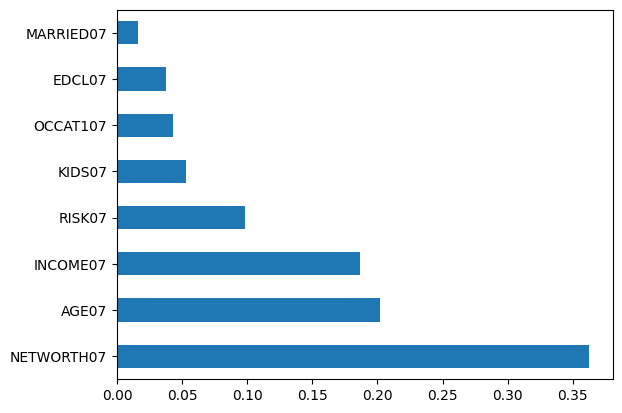

In [ ]:
model = RandomForestRegressor(n_estimators= 350,n_jobs=-1)
model.fit(X_train,y_train)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
from pickle import dump
from pickle import load

filename = 'model_rt.sav'
dump(model, open(filename, 'wb'))

In [ ]:
loaded_model = load(open(filename, 'rb'))

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

predictions = loaded_model.predict(X_test)
result = mean_squared_error(y_test, predictions)
print("R2 score = ",r2_score(y_test, predictions))
print("MSE = ",result)

R2 score =  0.7675115465963649
MSE =  0.008247727691014407
